In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/jeffreyhazboun/GoogleDrive/PulsarSignalSimulator/PulsarSimulator/VersionZeroPointZero/')
import VersionZeroPointZero.signal as sig
import VersionZeroPointZero.pulsar as puls
import VersionZeroPointZero.ism as ism
import VersionZeroPointZero.telescope as telescope
import math, scipy
import scipy as sp
from scipy import signal

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
Periods = 1200
PeriodBins = 2500
Nt = Periods*PeriodBins
S1 = sig.Signal(81, 100, 20, Nt, 50*Periods)
print("Number of Time Bins:",Nt)

Number of Time Bins: 3000000


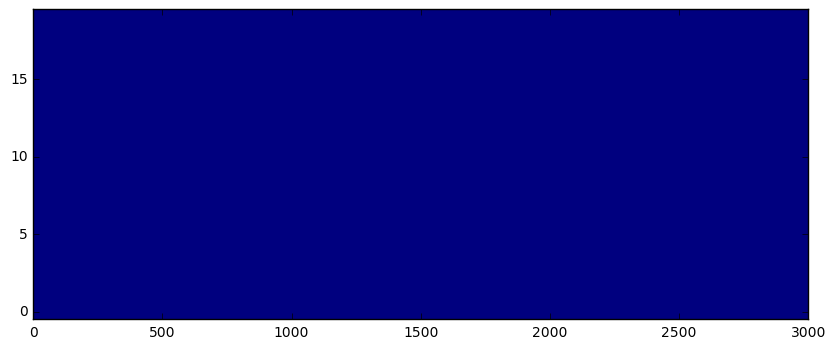

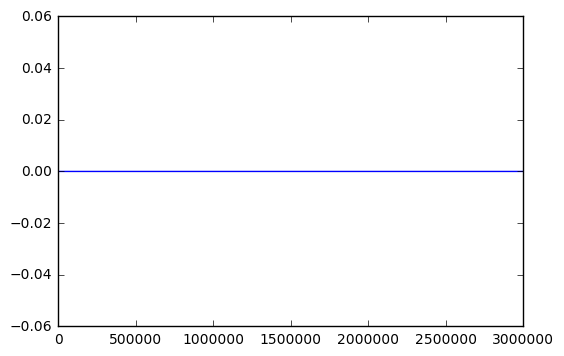

In [4]:
plt.figure(figsize=[10,4])
plt.xlim(0,3000)
plt.imshow(S1.signal,origin='left',aspect='auto',interpolation='none')
plt.show()
plt.plot(S1.signal[0,:])
plt.show()

In [5]:
P1 = puls.Pulsar(S1)
P1.TimeBinSize

0.02

In [6]:
P1.pulses()

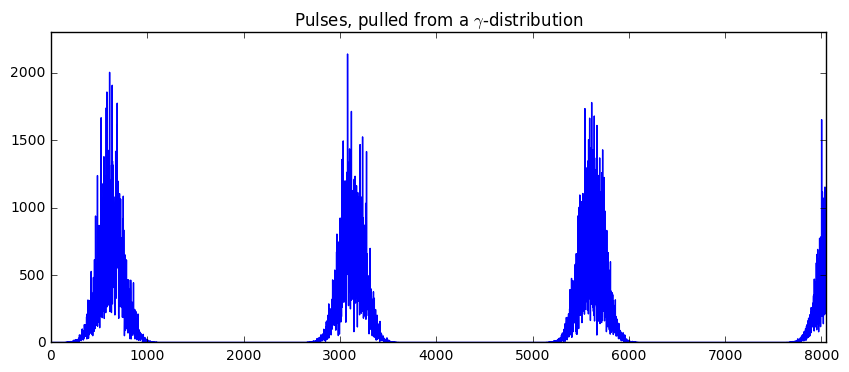

In [10]:
plt.figure(figsize=[10,4])
plt.xlim(0,8048)
plt.ylim(0,2300)
#plt.yticks([])
plt.title("Pulses, pulled from a $\gamma$-distribution")
plt.plot(P1.signal[0,:])
plt.show()

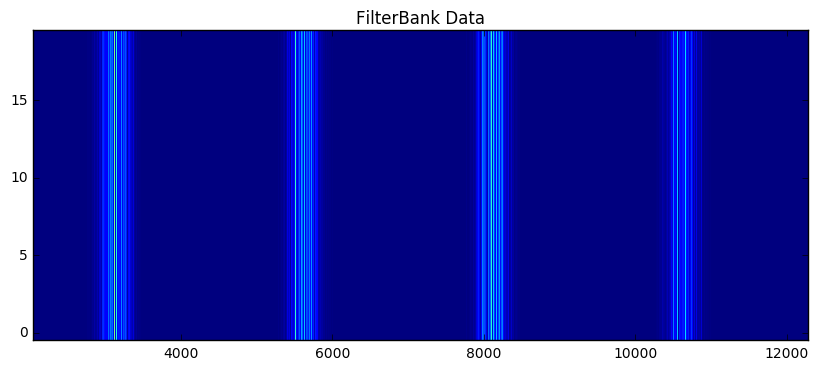

In [28]:
plt.figure(figsize=[10,4])
plt.xlim(2048,6*2048)
plt.title("FilterBank Data")
plt.imshow(S1.signal,origin='left',aspect='auto',interpolation='none')
plt.show()

In [29]:
ISM1 = ism.ISM(S1)

In [30]:
ISM1.disperse(.2)

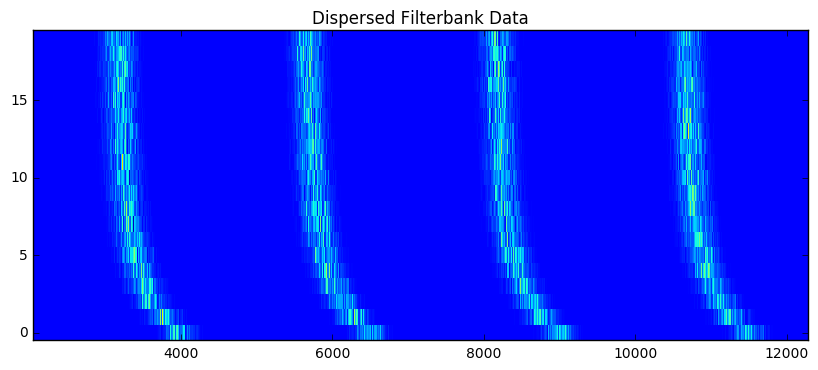

In [31]:
plt.figure(figsize=[10,4])
plt.xlim(2048,6*2048)
plt.title("Dispersed Filterbank Data")
plt.imshow(S1.signal,origin='left',aspect='auto',interpolation='none')
plt.show()

In [32]:
GBT1 = telescope.Telescope(S1)

In [33]:
GBT1.observe(noise=True)

Input signal sampling frequency=  50.0  kHz.
Telescope sampling frequency =  25.0  kHz


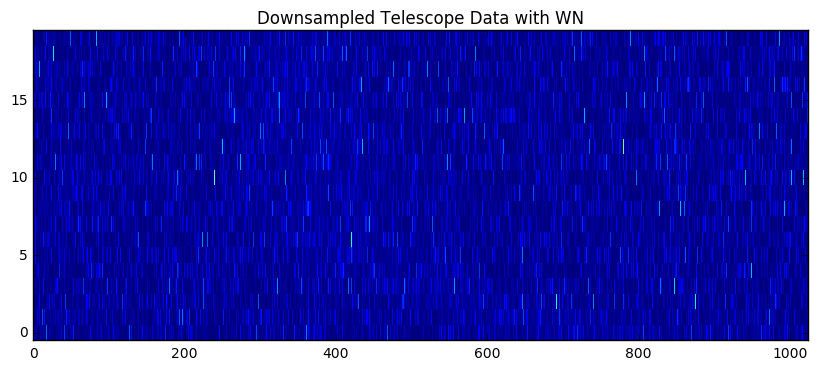

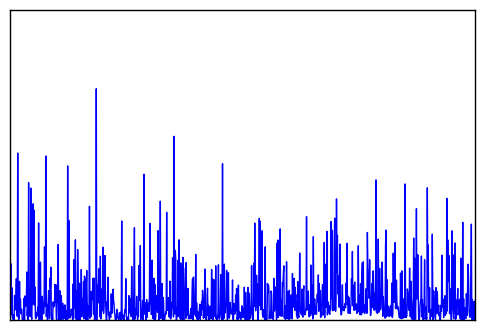

In [34]:
plt.figure(figsize=[10,4])
plt.title("Downsampled Telescope Data with WN")
plt.xlim(0,1024)
plt.imshow(GBT1.signal,origin='left',aspect='auto',interpolation='none')
plt.show()
plt.xlim(0,1024)
plt.ylim(0,30000)
plt.yticks([])
plt.xticks([])
plt.plot(GBT1.signal[0,:])
plt.show()

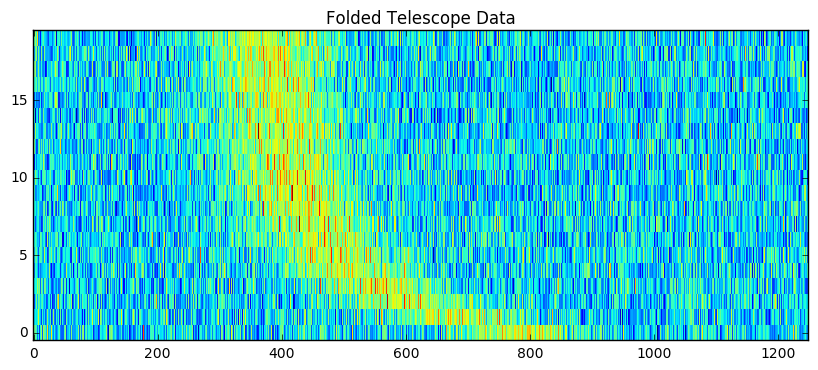

In [39]:
GBT1.fold(50.0, N_Folds=80)#(Period (ms), Number of Folds)
plt.figure(figsize=[10,4])
#plt.xlim(0,1024)
plt.title("Folded Telescope Data")
plt.imshow(GBT1.folded,origin='left',aspect='auto',interpolation='none')
plt.show()

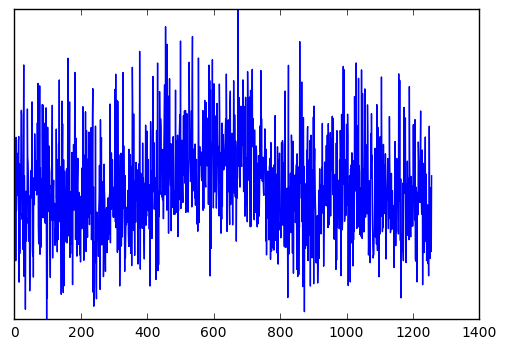

In [36]:
#plt.xlim(0,1024)
plt.yticks([])
plt.plot(GBT1.folded[0,:])

plt.show()